In [71]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
dataset=pd.read_csv("C:/Users/hrashikesh hegde/Downloads/train.csv")

In [73]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
dataset.shape

(891, 12)

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [77]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

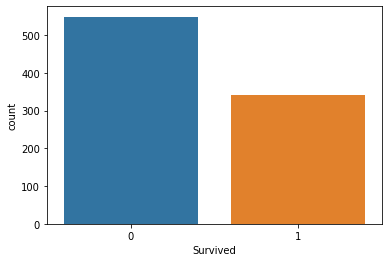

In [78]:
sb.countplot("Survived",data=dataset)

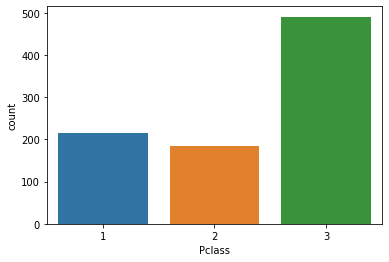

In [79]:
sb.countplot("Pclass",data=dataset)

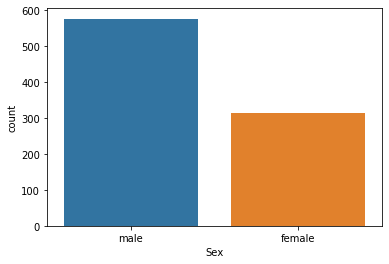

In [80]:
sb.countplot("Sex",data=dataset)

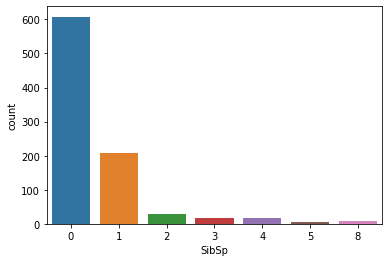

In [81]:
sb.countplot("SibSp",data=dataset)

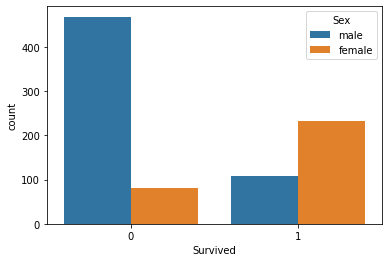

In [82]:
sb.countplot("Survived",data=dataset,hue="Sex")

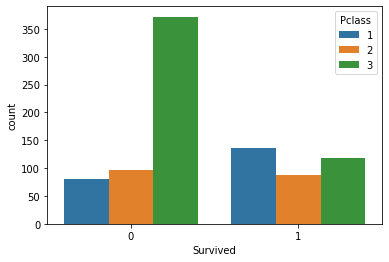

In [83]:
sb.countplot("Survived",data=dataset,hue="Pclass")

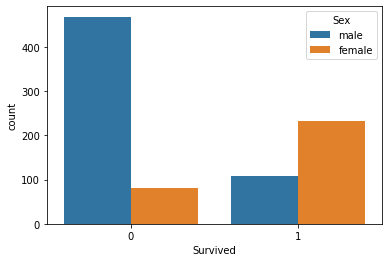

In [84]:
sb.countplot("Survived",data=dataset,hue="Sex")

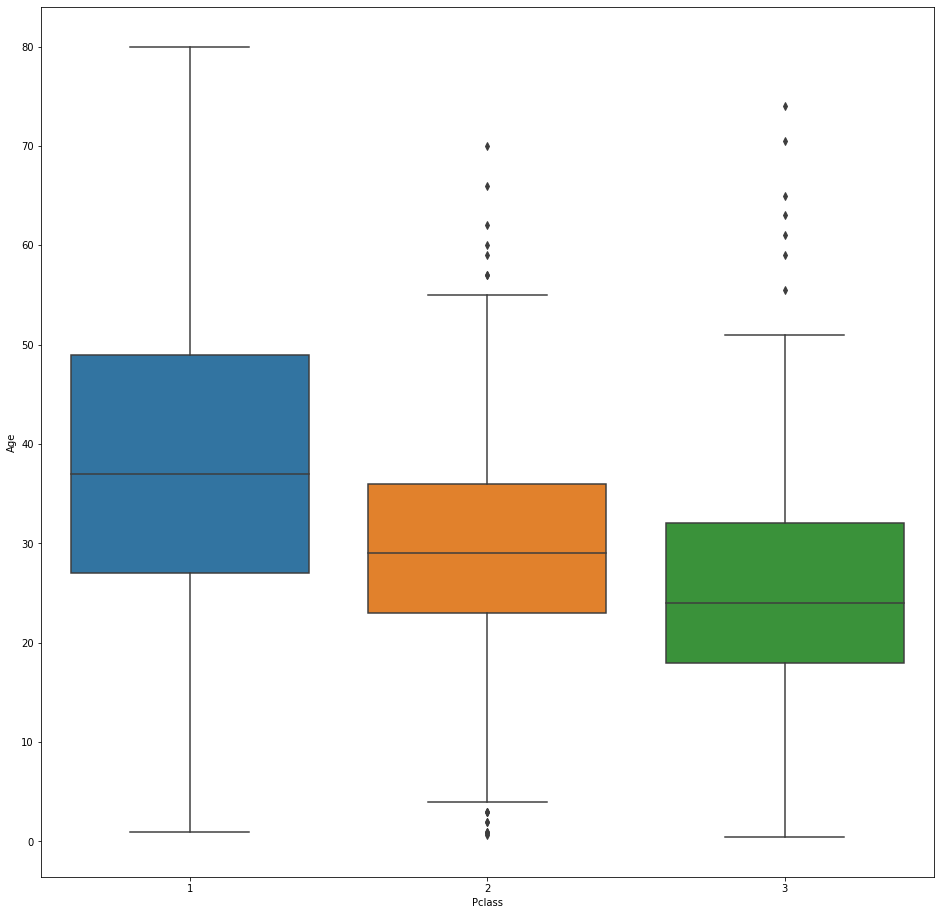

In [85]:
plt.figure(figsize=(16,16))

sb.boxplot(x="Pclass",y="Age",data=dataset)


In [86]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[0]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return(Age)
        

In [87]:
dataset["Age"]=dataset[["Age","Pclass"]].apply(impute_age,axis=1)

In [88]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

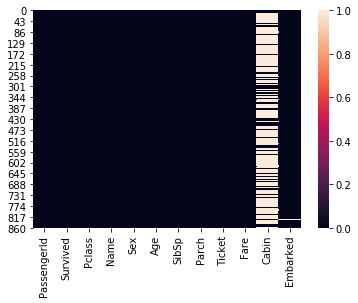

In [89]:
sb.heatmap(dataset.isnull())

In [90]:
pd.crosstab(index=dataset["Embarked"],columns="Count")

col_0,Count
Embarked,
C,168
Q,77
S,644


In [91]:
dataset.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [92]:
column_value="S"
dataset["Embarked"]=dataset["Embarked"].fillna(column_value)

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
sex=pd.get_dummies(dataset["Sex"],drop_first=True)
embark=pd.get_dummies(dataset["Embarked"],drop_first=True)
pclass=pd.get_dummies(dataset["Pclass"],drop_first=True)

In [95]:
dataset.drop(["PassengerId","Sex","Embarked","Name","Ticket","Cabin","Pclass"],axis=1,inplace=True)

In [96]:
dataset=pd.concat([dataset,sex,embark,pclass],axis=1)

In [97]:
dataset.shape

(891, 10)

In [98]:
dataset.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.drop("Survived",axis=1),
                                         dataset["Survived"],test_size=0.20,
                                          random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
logmodel.score(X_train,y_train)

0.8174157303370787

In [102]:
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
331,45.5,0,0,28.500,1,0,1,0,0
700,18.0,1,0,227.525,0,0,0,0,0
748,19.0,1,0,53.100,1,0,1,0,0
751,6.0,0,1,12.475,1,0,1,0,1
481,24.0,0,0,0.000,1,0,1,1,0


TEST DATA

In [103]:
dataset2=pd.read_csv("C:/Users/hrashikesh hegde/Downloads/test.csv")

In [104]:
dataset2.shape

(418, 11)

In [105]:
dataset2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
dataset2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [107]:
dataset2["Age"]=dataset2[["Age","Pclass"]].apply(impute_age,axis=1)

In [108]:
dataset2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
def impute_Fare(Fare):
    if pd.isnull(Fare):
            return 35.62
    else:
        return Fare

In [110]:
dataset2["Fare"]=dataset2["Fare"].apply(impute_Fare)

In [111]:
dataset2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [112]:
sex_test=pd.get_dummies(dataset2["Sex"],drop_first=True)
embark_test=pd.get_dummies(dataset2["Embarked"],drop_first=True)
pclass_test=pd.get_dummies(dataset2["Pclass"],drop_first=True)

In [113]:
PassengerID=dataset2["PassengerId"]

In [114]:
dataset2.drop(["PassengerId","Sex","Embarked","Name","Ticket","Cabin","Pclass"],axis=1,inplace=True)

In [115]:
dataset2=pd.concat([dataset2,sex_test,embark_test,pclass_test],axis=1)

In [116]:
dataset2.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [117]:
X_test=dataset2

In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age      418 non-null float64
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     418 non-null float64
male     418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [119]:
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [120]:
y_pred_test=logmodel.predict(X_test)

In [121]:
y_pred_test[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [122]:
logmodel.predict_proba(X_test)[0:5]

array([[0.8955604 , 0.1044396 ],
       [0.63582034, 0.36417966],
       [0.83462105, 0.16537895],
       [0.89714726, 0.10285274],
       [0.49511984, 0.50488016]])

In [123]:
finalDf=pd.DataFrame({"PassengerID":PassengerID,"Survived":y_pred_test})

In [124]:
finalDf.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [125]:
finalDf.shape

(418, 2)

In [126]:
finalDf.to_csv("titanic_pred.csv",index=False)

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [134]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',lable='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='__')
    plt.xlabel()
    plt.ylable()
    plt.title()
    plt.show()

In [138]:
auc =roc_auc_score(y_train,X_test)
plot_roc_curve

ValueError: Found input variables with inconsistent numbers of samples: [712, 418]